In [20]:
import pandas as pd
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import canny
from skimage.filters import sobel
from scipy import ndimage as ndi
from skimage.filters import threshold_otsu
from skimage.morphology import closing, square
from skimage.transform import hough_line, hough_line_peaks
from scipy.ndimage import maximum_filter, label
from skimage.filters import threshold_otsu
from scipy.signal import find_peaks
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d

In [2]:
#Cargamos los archivos
archivo = fits.open('Capela10min.FIT')
dark_data = fits.open('dark600.FIT')
#Vemos la informacion de los archivos
archivo.info()
dark_data.info()
# Obtener los datos de la imagen y dark
data = archivo[0].data
dark=dark_data[0].data

Filename: Capela10min.FIT
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (1530, 1020)   int16 (rescales to uint16)   
Filename: dark600.FIT
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (1530, 1020)   int16 (rescales to uint16)   


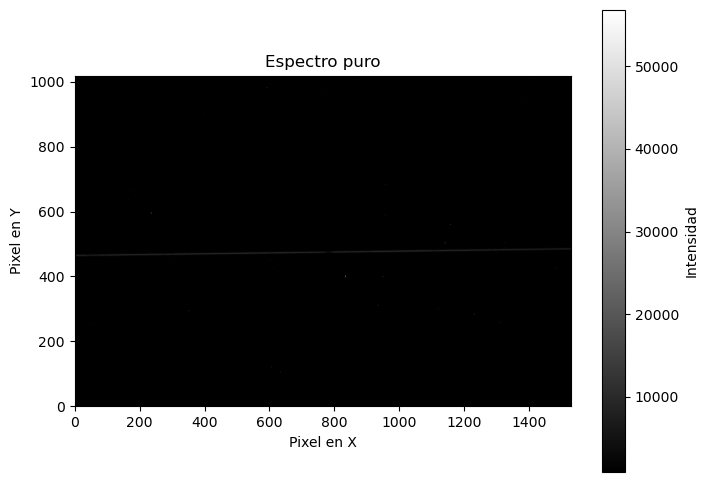

In [3]:
# Graficar la imagen
plt.figure(figsize=(8, 6))
plt.imshow(data, cmap='gray', origin='lower')
plt.colorbar(label='Intensidad')
plt.title('Espectro puro')
plt.xlabel('Pixel en X')
plt.ylabel('Pixel en Y')
plt.show()

### Otsu con masacar rectangular automatica

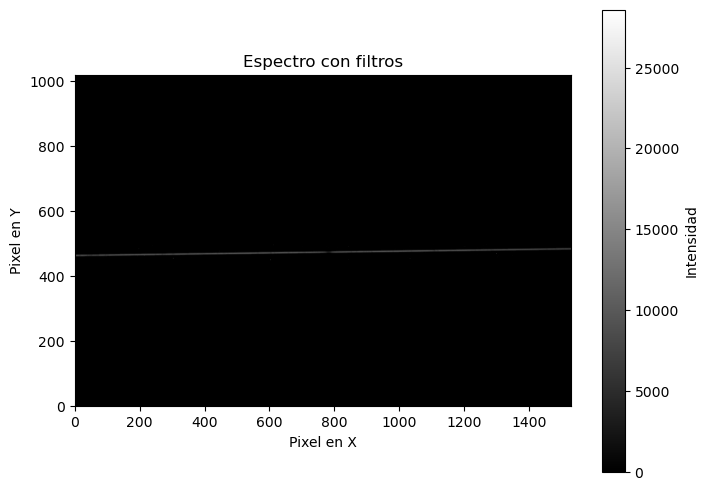

In [4]:
# Calculamos el threshold para determinar qué es fondo, con el metodo de otsu
threshold = threshold_otsu(data)*0.4

# Copiamos la información de la imagen para no alterar la original
modified_data = data.copy()

# Todo lo que es fondo es enviado a cero (filtro 1)
modified_data[modified_data < threshold] = 0

# Definimos la región de interés en el eje, en este caso es un rango que en el que siempre estan los espectros
y_start = 450 
y_end = 500

# Creamos una máscara booleana para seleccionar los valores dentro del rango de interés en el eje y
mask = np.logical_and(y_start <= np.arange(modified_data.shape[0]), np.arange(modified_data.shape[0]) < y_end)

# Aplicamos la máscara a lo largo del eje y para mantener solo la región de interés (filtro 2)
modified_data[~mask, :] = 0

# Graficamos la imagen con la máscara aplicada
plt.figure(figsize=(8, 6))
plt.imshow(modified_data, cmap='gray', origin='lower')
plt.colorbar(label='Intensidad')
plt.title('Espectro con filtros')
plt.xlabel('Pixel en X')
plt.ylabel('Pixel en Y')
plt.show()

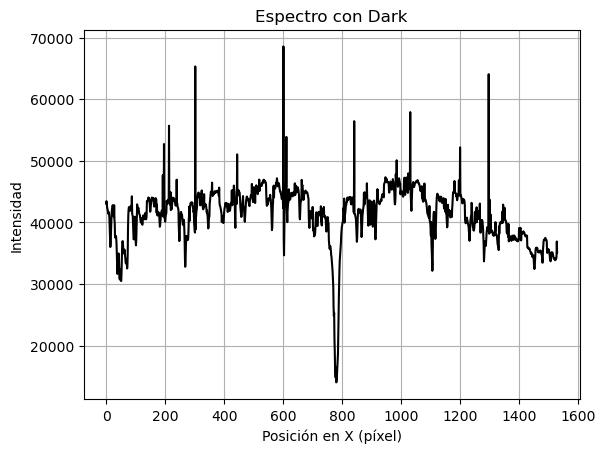

In [5]:
intensity_per_column = np.sum(modified_data[:,:], axis=0)

# Graficar la intensidad vs la posición en x para la banda de interés
plt.plot(intensity_per_column, color='black')
plt.xlabel('Posición en X (píxel)')
plt.ylabel('Intensidad')
plt.title('Espectro con Dark')
plt.grid(True)
plt.show()

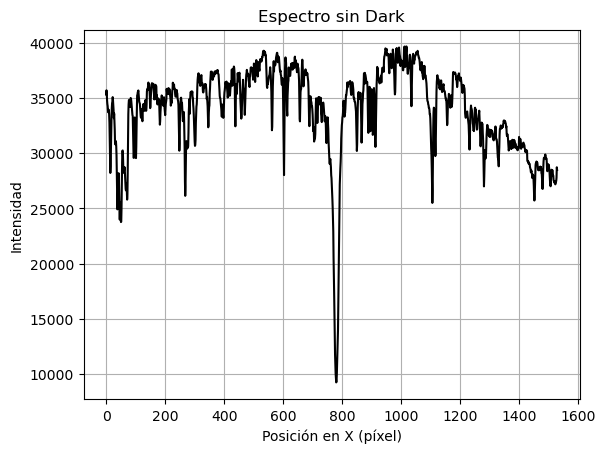

In [6]:
# Restar 'dark' de 'modified_data'
modified_data_l = np.subtract(modified_data.tolist(), dark.tolist())

# Convertir los valores negativos a cero
modified_data_l[modified_data_l < 0] = 0

# Sumar los valores en cada columna dentro del rango alrededor del centro de la banda
intensity_per_column_l = np.sum(modified_data_l[:,:], axis=0)

# Graficar la intensidad vs la posición en x para la banda de interés
plt.plot(intensity_per_column_l, color='black')
plt.xlabel('Posición en X (píxel)')
plt.ylabel('Intensidad')
plt.title('Espectro sin Dark')
plt.grid(True)
plt.show()

### Ahora obtendremos la estos espectros de manera sistematica

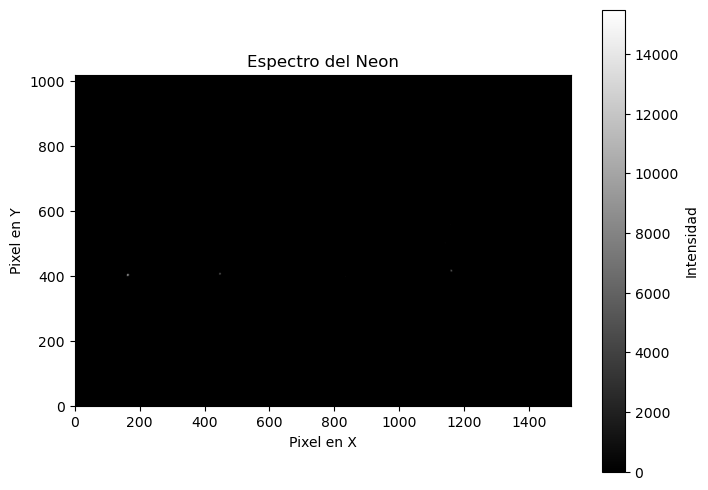

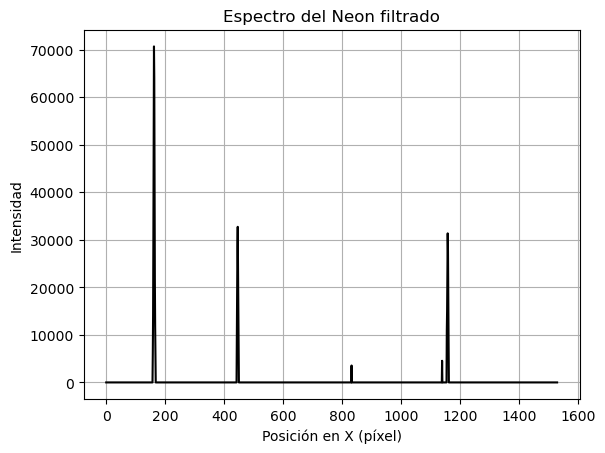

In [7]:
#Cargamos los archivos
neon_img = fits.open('neon.FIT')
neon = neon_img[0].data

modified_neon = neon.copy()

# Calculamos el threshold para determinar qué es fondo, con el metodo de otsu
threshold = threshold_otsu(neon)*0.35

# Todo lo que es fondo es enviado a cero (filtro 1)
modified_neon[modified_neon < threshold] = 0


# Graficamos la imagen con la máscara aplicada
plt.figure(figsize=(8, 6))
plt.imshow(modified_neon, cmap='gray', origin='lower')
plt.colorbar(label='Intensidad')
plt.title('Espectro del Neon')
plt.xlabel('Pixel en X')
plt.ylabel('Pixel en Y')
plt.show()

intensity_per_column_neon = np.sum(modified_neon[:,:], axis=0)

# Graficar la intensidad vs la posición en x para la banda de interés
plt.plot(intensity_per_column_neon, color='black')
plt.xlabel('Posición en X (píxel)')
plt.ylabel('Intensidad')
plt.title('Espectro del Neon filtrado')
plt.grid(True)
plt.show()

In [8]:
dark_img = fits.open('dark600.FIT')
dark = dark_img[0].data

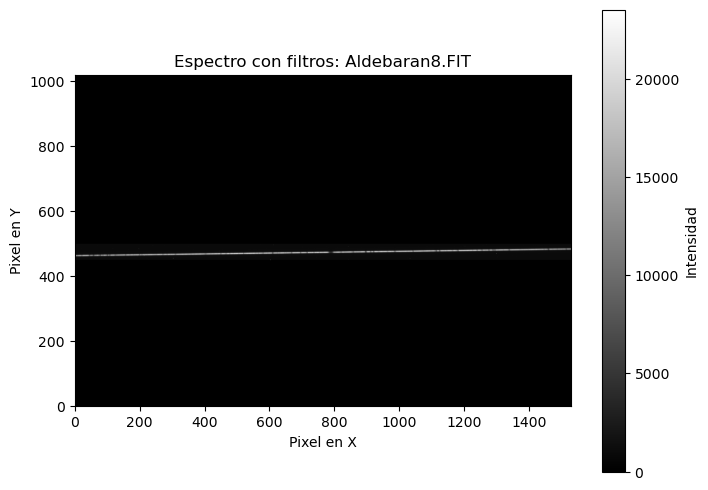

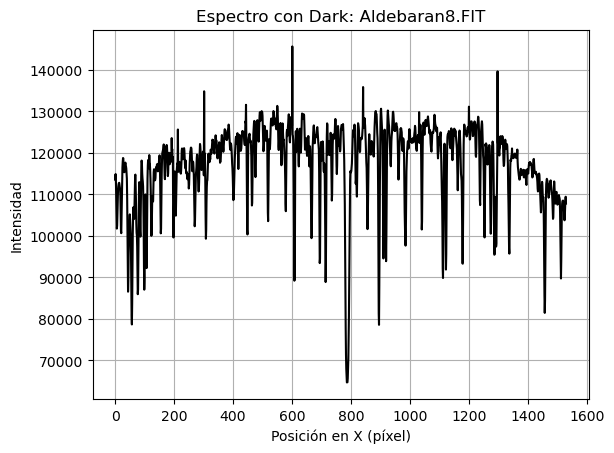

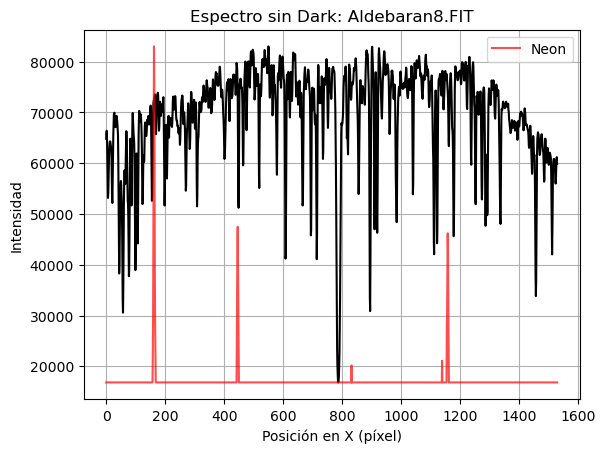

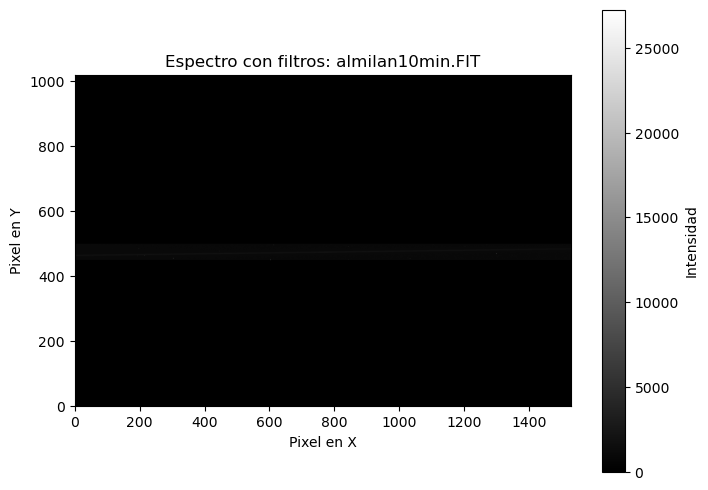

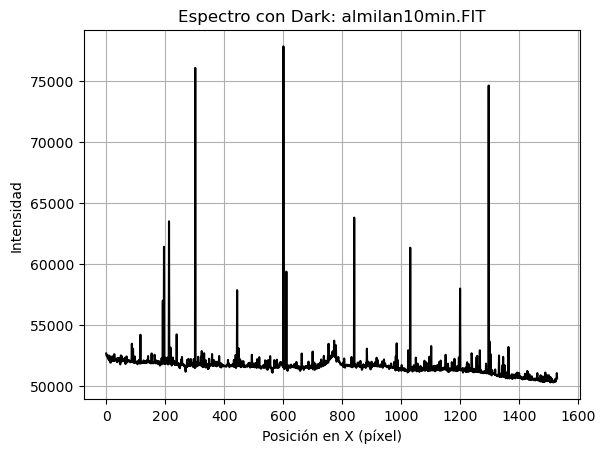

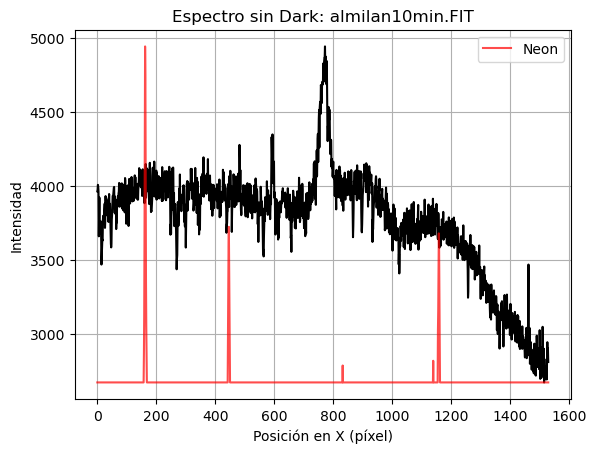

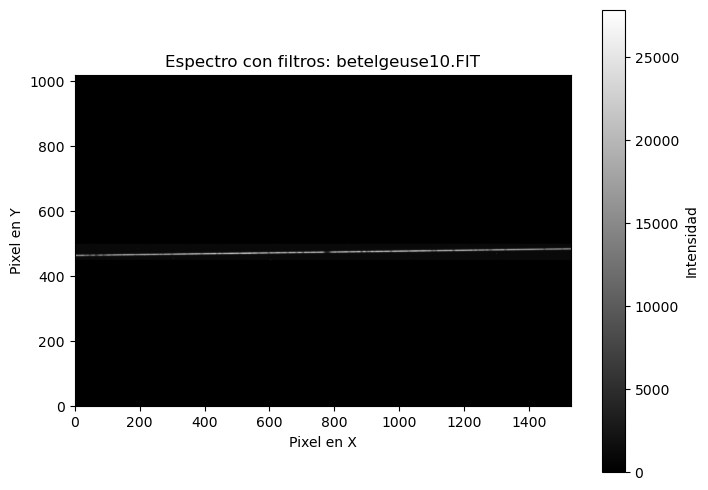

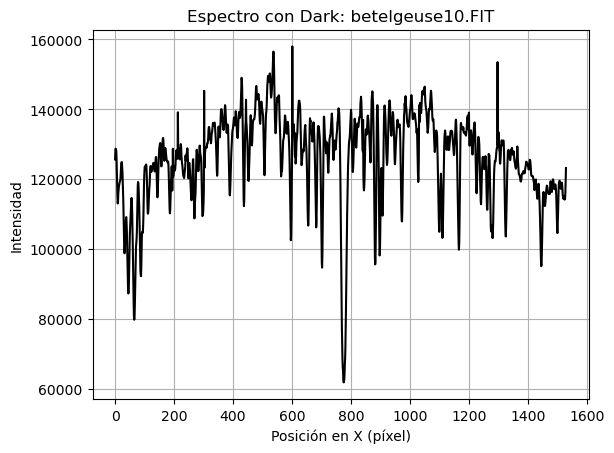

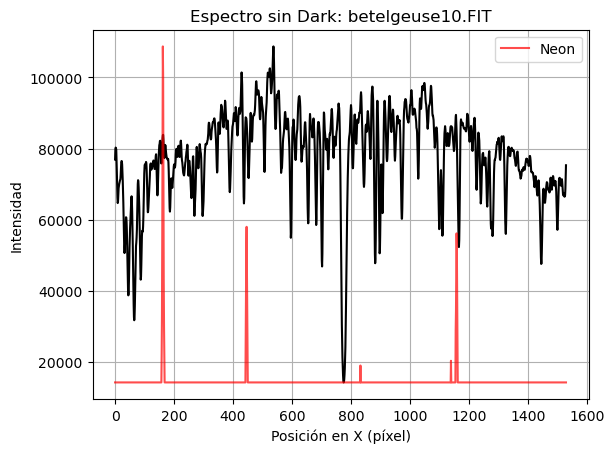

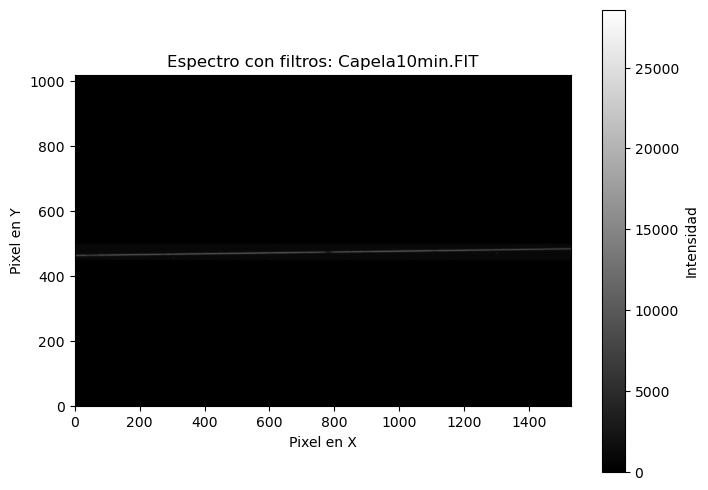

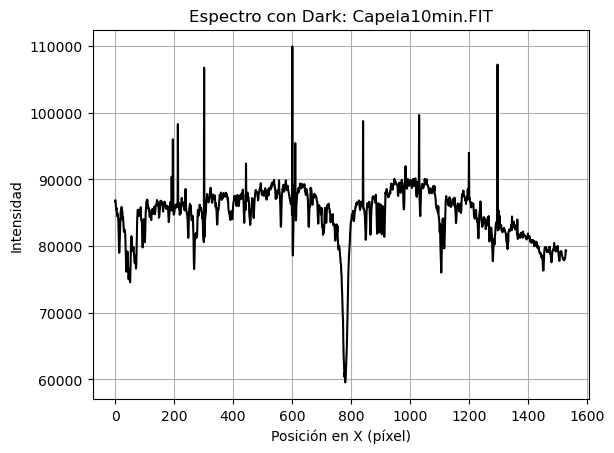

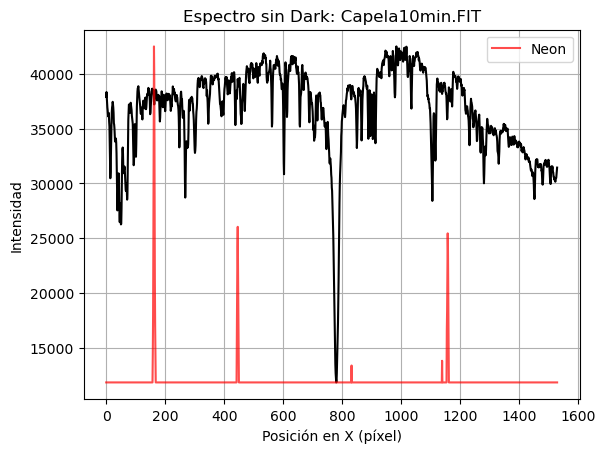

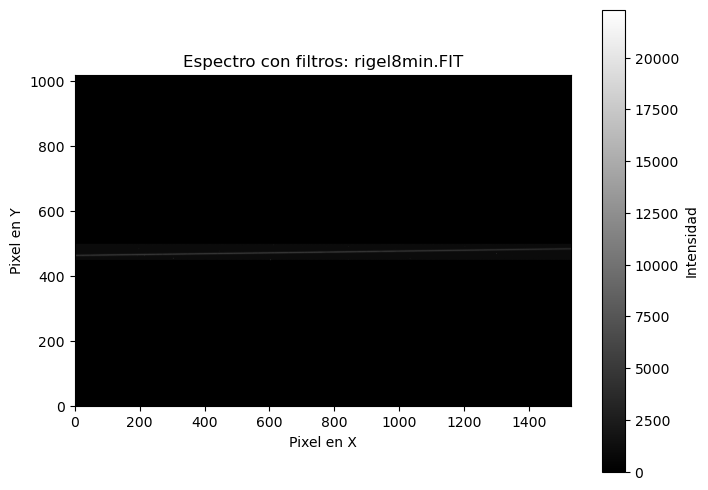

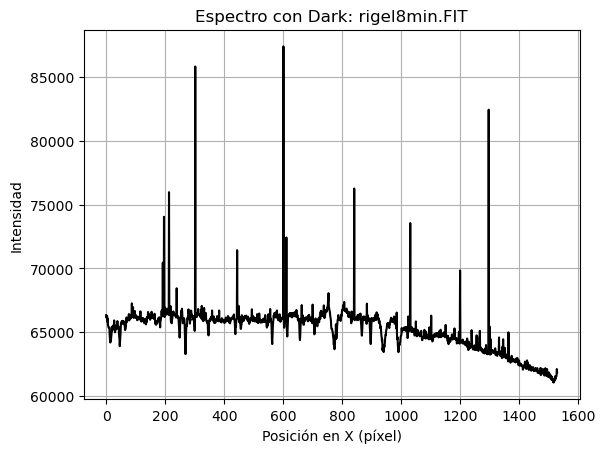

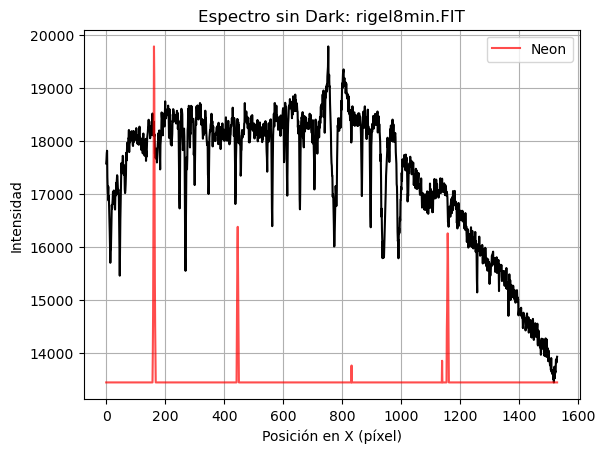

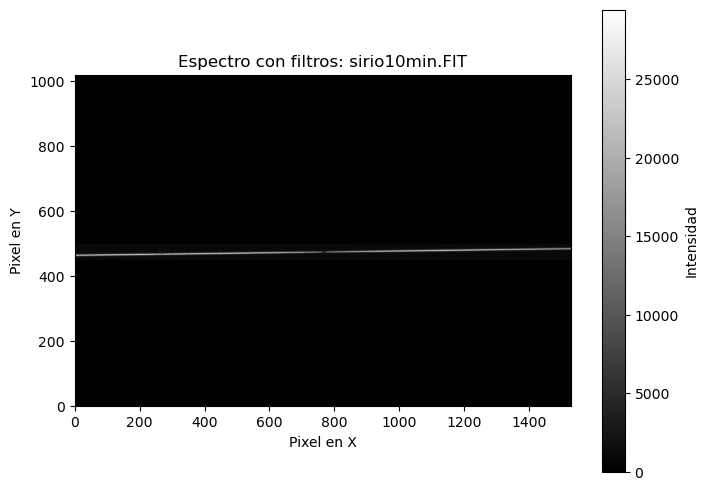

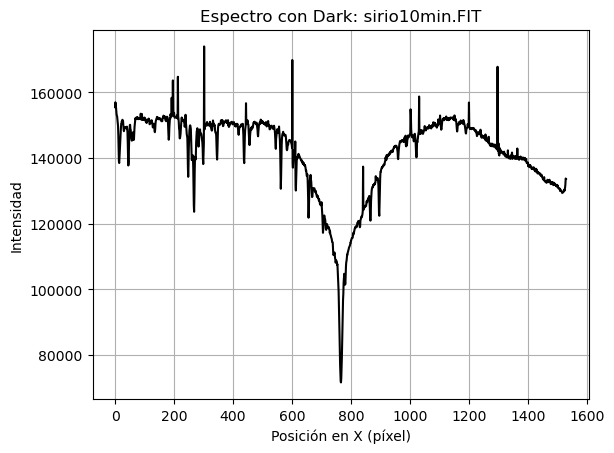

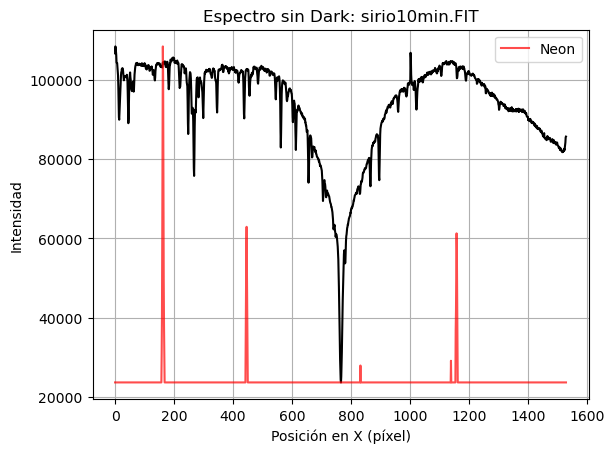

FileNotFoundError: [Errno 2] No such file or directory: 'Regulo 10min.FIT'

In [9]:
spectra= ['Aldebaran8.FIT', 'almilan10min.FIT', 'betelgeuse10.FIT', 'Capela10min.FIT', 'rigel8min.FIT',
          'sirio10min.FIT', 'Regulo 10min.FIT', 'Algol_10min.FIT', 'Castor 10min.FIT', 'Pollux 10min.FIT', 
          'Wezen 10min.FIT', 'Wezn.FIT' ]

# Diccionario para almacenar los arrays intensity_per_column_l
spectra_clean = {}

for i in spectra:
    spec_img = fits.open(i)
    spec = spec_img[0].data
    
    # Calculamos el threshold para determinar qué es fondo, con el metodo de otsu
    threshold = threshold_otsu(spec)*0.0
    
    # Copiamos la información de la imagen para no alterar la original
    modified_spec = spec.copy()
    
    # Todo lo que es fondo es enviado a cero (filtro 1)
    modified_spec[modified_spec < threshold] = 0
    
    # Definimos la región de interés en el eje, en este caso es un rango que en el que siempre estan los espectros
    y_start = 450 
    y_end = 500
    
    # Creamos una máscara booleana para seleccionar los valores dentro del rango de interés en el eje y
    mask = np.logical_and(y_start <= np.arange(modified_spec.shape[0]), np.arange(modified_spec.shape[0]) < y_end)
    
    # Aplicamos la máscara a lo largo del eje y para mantener solo la región de interés (filtro 2)
    modified_spec[~mask, :] = 0
    
    # Graficamos la imagen con la máscara aplicada
    plt.figure(figsize=(8, 6))
    plt.imshow(modified_spec, cmap='gray', origin='lower')
    plt.colorbar(label='Intensidad')
    plt.title('Espectro con filtros: '+i)
    plt.xlabel('Pixel en X')
    plt.ylabel('Pixel en Y')
    plt.show()

    intensity_per_column = np.sum(modified_spec[:,:], axis=0)

    # Graficar la intensidad vs la posición en x para la banda de interés
    plt.plot(intensity_per_column, color='black')
    plt.xlabel('Posición en X (píxel)')
    plt.ylabel('Intensidad')
    plt.title('Espectro con Dark: '+i)
    plt.grid(True)
    plt.show()

    # Restar 'dark' de 'modified_data'
    modified_spec_l = np.subtract(modified_spec.tolist(), dark.tolist())
    
    # Convertir los valores negativos a cero
    modified_spec_l[modified_spec_l < 0] = 0
    
    # Sumar los valores en cada columna dentro del rango alrededor del centro de la banda
    intensity_per_column_l = np.sum(modified_spec_l[:,:], axis=0)

     # Almacenamos el array en el diccionario
    spectra_clean[i] = intensity_per_column_l

    # Ajuste lineal para que la intensidad del espectro de neón esté en el mismo rango que intensity_per_column_l
    min_val_l = np.min(intensity_per_column_l)
    max_val_l = np.max(intensity_per_column_l)
    range_val_l = max_val_l - min_val_l
    min_val_neon = np.min(intensity_per_column_neon)
    max_val_neon = np.max(intensity_per_column_neon)
    range_val_neon = max_val_neon - min_val_neon
    # Escalamos intensity_per_column_neon para que esté dentro del rango de intensity_per_column_l
    intensity_per_column_neon_scaled = ((intensity_per_column_neon - min_val_neon) / range_val_neon) * range_val_l + min_val_l

    plt.plot(intensity_per_column_l, color='black')
    plt.plot(intensity_per_column_neon_scaled, color='red', alpha=0.7, label='Neon')
    plt.xlabel('Posición en X (píxel)')
    plt.ylabel('Intensidad')
    plt.title('Espectro sin Dark: '+i)
    plt.grid(True)
    plt.legend()  # Agregar leyenda
    plt.show()

In [10]:
spectra_clean

{'Aldebaran8.FIT': array([64796, 66168, 66390, ..., 60719, 61186, 59862]),
 'almilan10min.FIT': array([3965, 3976, 4009, ..., 2824, 2902, 2811]),
 'betelgeuse10.FIT': array([76900, 79667, 80265, ..., 68620, 72035, 75279]),
 'Capela10min.FIT': array([37891, 38341, 37928, ..., 30809, 31151, 31440]),
 'rigel8min.FIT': array([17580, 17650, 17776, ..., 13823, 13893, 13932]),
 'sirio10min.FIT': array([106712, 108456, 108210, ...,  84230,  85533,  85702])}

Índices de los máximos puntos: [ 162  446  832 1139 1158]


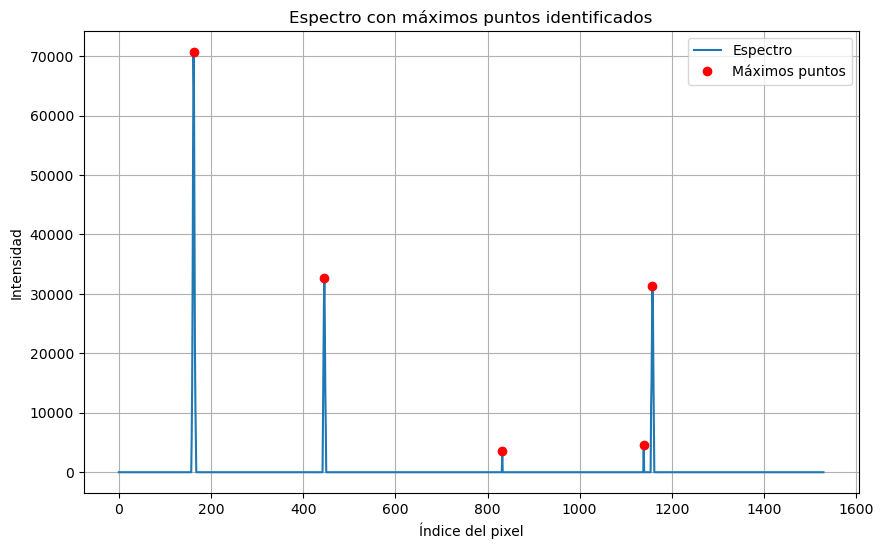

In [17]:
# Encuentra los índices de los máximos puntos
maximos_indices = argrelextrema(intensity_per_column_neon, np.greater)[0]

# Muestra los índices de los máximos puntos
print("Índices de los máximos puntos:", maximos_indices)

# Visualización del espectro y los máximos puntos encontrados
plt.figure(figsize=(10, 6))
plt.plot(intensity_per_column_neon, label='Espectro')
plt.plot(maximos_indices, intensity_per_column_neon[maximos_indices], 'ro', label='Máximos puntos')
plt.xlabel('Índice del pixel')
plt.ylabel('Intensidad')
plt.title('Espectro con máximos puntos identificados')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
longitud_onda= [659.89, 667.81,  703.24, 717.39, 735.92]
maximos_indices


array([ 162,  446,  832, 1139, 1158], dtype=int64)

In [25]:
# Crear una función de interpolación lineal
interpolacion = interp1d(maximos_indices, longitud_onda, kind='linear', fill_value='extrapolate')

# Array de píxeles del espectro de la estrella
pixeles_estrella = np.arange(0, 1530)  # Ajusta el rango según la longitud de tu espectro

# Calibrar los píxeles a longitudes de onda utilizando la interpolación
longitudes_de_onda_estrella = interpolacion(pixeles_estrella)

# Verificación: Mostrar las primeras 10 longitudes de onda calibradas
print("Longitudes de onda calibradas para los primeros 10 píxeles:", longitudes_de_onda_estrella[:10])

Longitudes de onda calibradas para los primeros 10 píxeles: [655.37225352 655.40014085 655.42802817 655.45591549 655.48380282
 655.51169014 655.53957746 655.56746479 655.59535211 655.62323944]


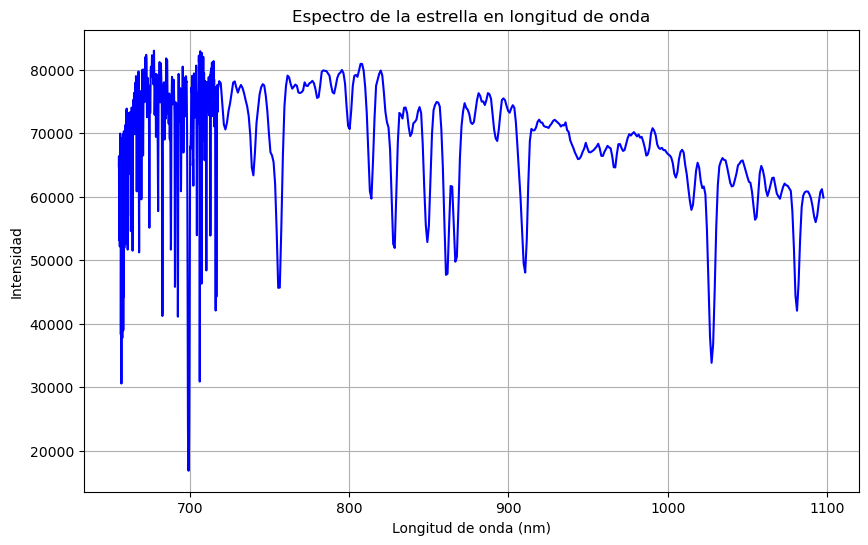

In [28]:
espectro_estrella = spectra_clean["Aldebaran8.FIT"]
# Visualización del espectro de la estrella en longitud de onda
plt.figure(figsize=(10, 6))
plt.plot(longitudes_de_onda_estrella, espectro_estrella, color='blue')
plt.xlabel('Longitud de onda (nm)')
plt.ylabel('Intensidad')
plt.title('Espectro de la estrella en longitud de onda')
plt.grid(True)
plt.show()

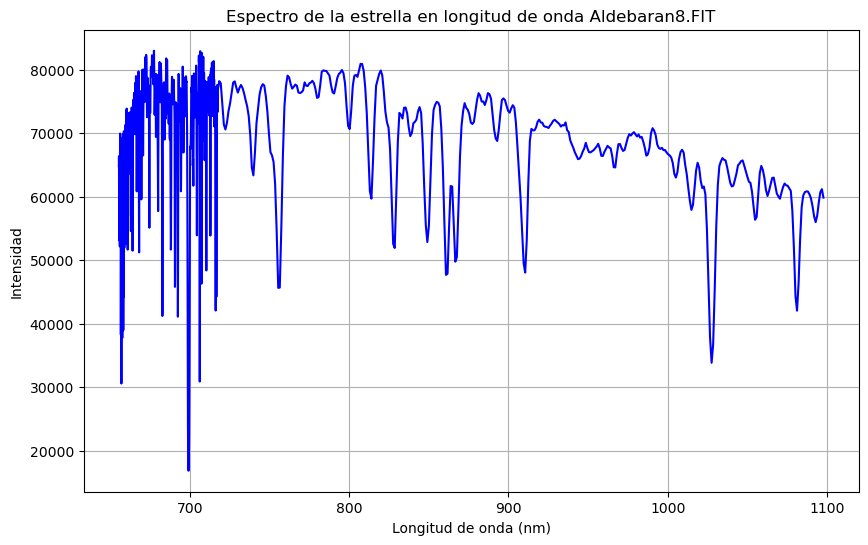

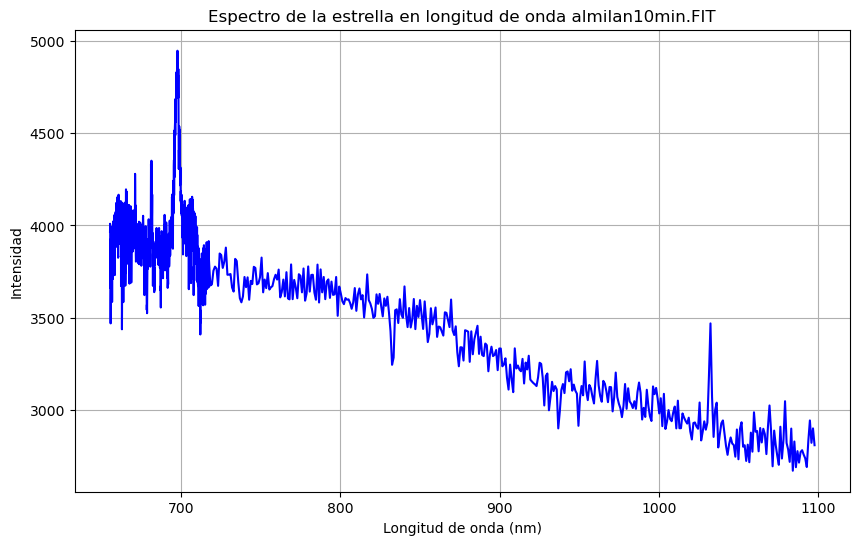

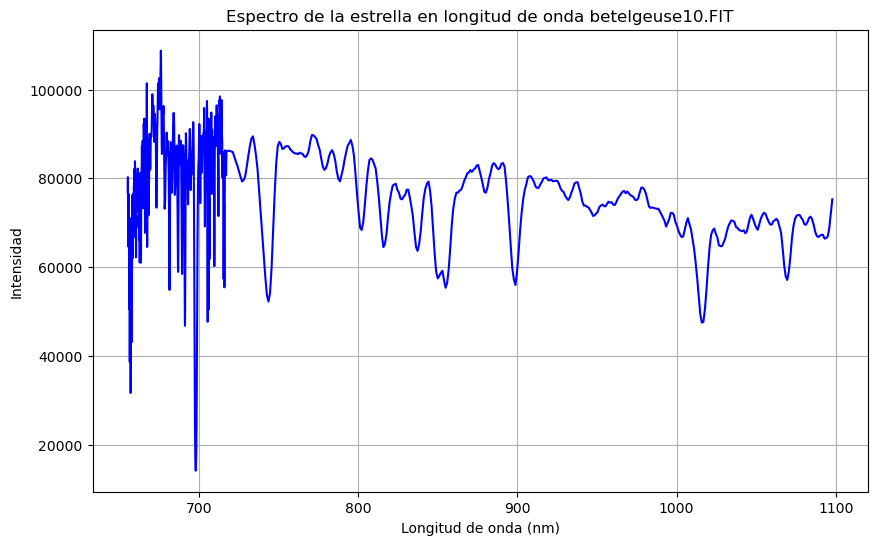

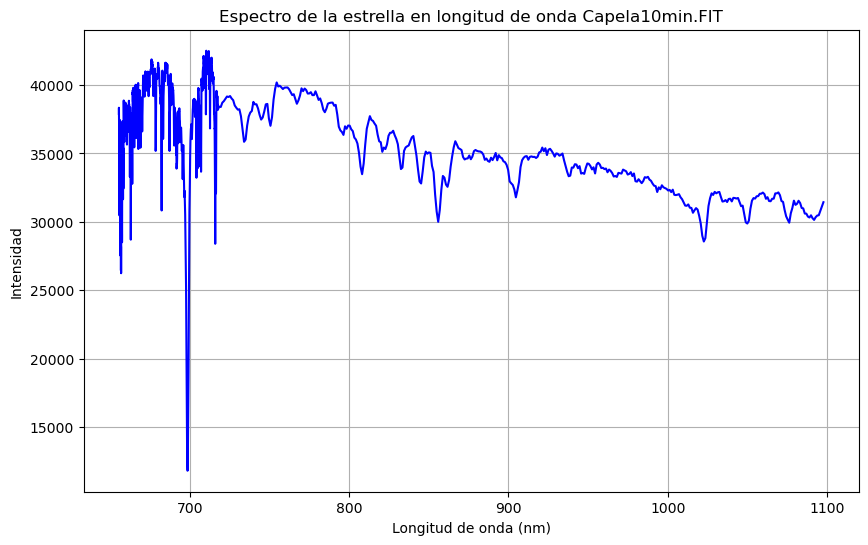

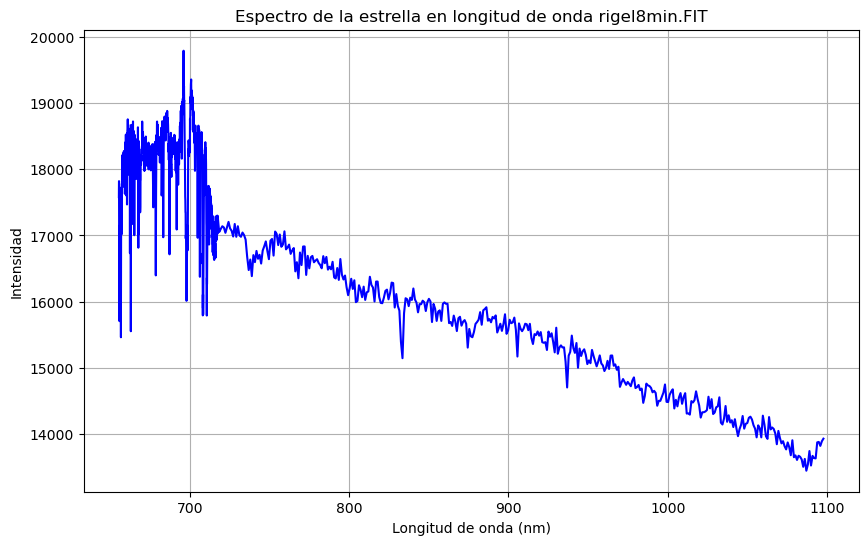

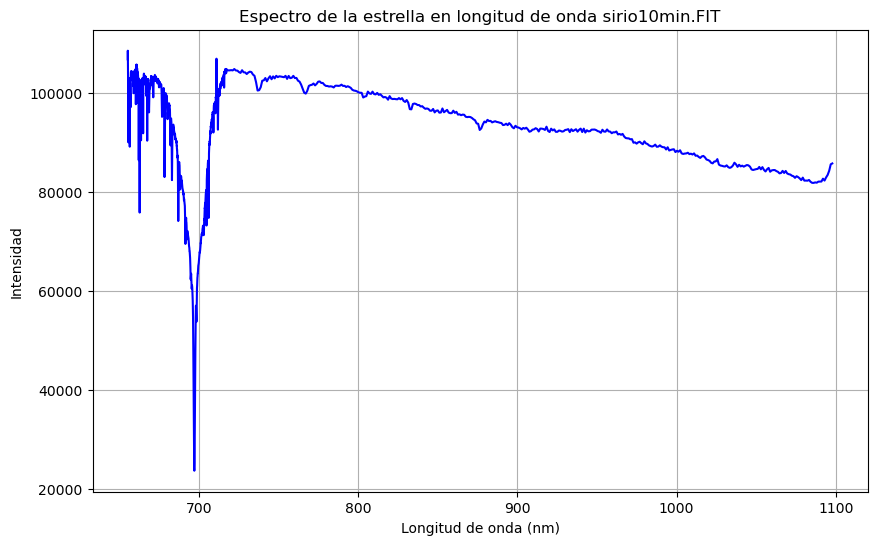

In [32]:
for clave, valor in spectra_clean.items():
    # Crear una función de interpolación lineal
    interpolacion = interp1d(maximos_indices, longitud_onda, kind='linear', fill_value='extrapolate')

    # Array de píxeles del espectro de la estrella
    pixeles_estrella = np.arange(0, len(valor))  # Ajusta el rango según la longitud de tu espectro

    # Calibrar los píxeles a longitudes de onda utilizando la interpolación
    longitudes_de_onda_estrella = interpolacion(pixeles_estrella)
    espectro_estrella = valor
    # Visualización del espectro de la estrella en longitud de onda
    plt.figure(figsize=(10, 6))
    plt.plot(longitudes_de_onda_estrella, espectro_estrella, color='blue')
    plt.xlabel('Longitud de onda (nm)')
    plt.ylabel('Intensidad')
    plt.title('Espectro de la estrella en longitud de onda '+ str(clave))
    plt.grid(True)
    plt.show()

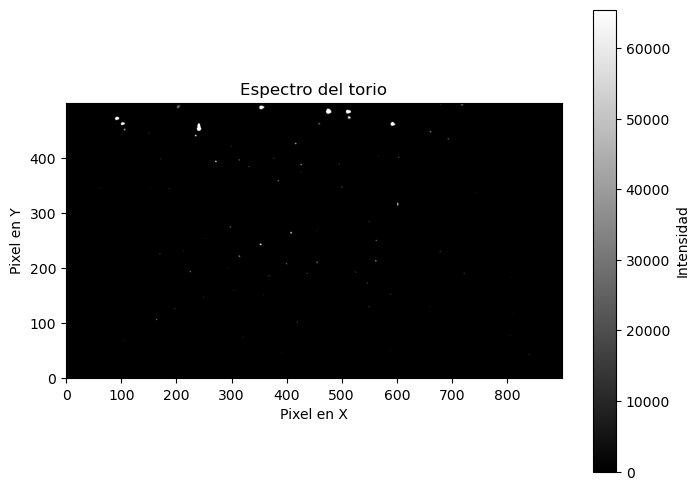

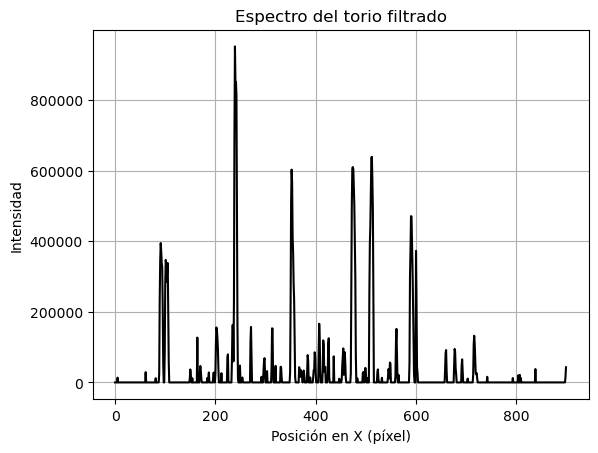

In [33]:
#Cargamos los archivos
torio_img = fits.open('20240221-012533-Th_60s-60s-1.fit')
torio = torio_img[0].data

modified_torio = torio.copy()

# Calculamos el threshold para determinar qué es fondo, con el metodo de otsu
threshold = threshold_otsu(torio)*0.35

# Todo lo que es fondo es enviado a cero (filtro 1)
modified_torio[modified_torio < threshold] = 0


# Graficamos la imagen con la máscara aplicada
plt.figure(figsize=(8, 6))
plt.imshow(modified_torio, cmap='gray', origin='lower')
plt.colorbar(label='Intensidad')
plt.title('Espectro del torio')
plt.xlabel('Pixel en X')
plt.ylabel('Pixel en Y')
plt.show()

intensity_per_column_torio = np.sum(modified_torio[:,:], axis=0)

# Graficar la intensidad vs la posición en x para la banda de interés
plt.plot(intensity_per_column_torio, color='black')
plt.xlabel('Posición en X (píxel)')
plt.ylabel('Intensidad')
plt.title('Espectro del torio filtrado')
plt.grid(True)
plt.show()

Índices de los máximos puntos: [  5  61  81  91 101 105 150 154 164 170 184 187 197 202 212 225 235 239
 249 254 271 292 298 303 313 320 330 352 367 370 376 384 389 396 398 407
 415 419 426 436 447 455 458 474 483 495 499 503 512 524 532 545 548 561
 565 590 600 660 677 692 703 716 721 742 793 804 807 809 838]


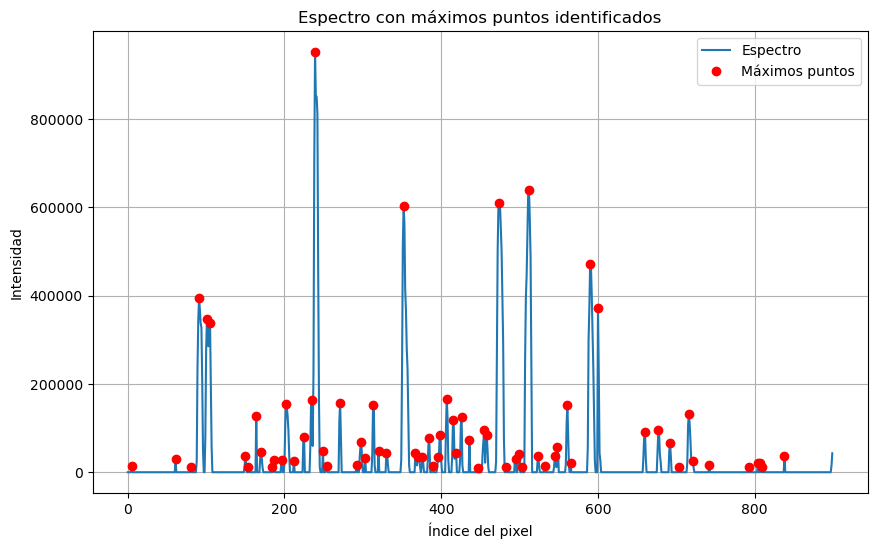

In [38]:
# Encuentra los índices de los máximos puntos
maximos_indices = argrelextrema(intensity_per_column_torio, np.greater)[0]

# Muestra los índices de los máximos puntos
print("Índices de los máximos puntos:", maximos_indices)

# Visualización del espectro y los máximos puntos encontrados
plt.figure(figsize=(10, 6))
plt.plot(intensity_per_column_torio, label='Espectro')
plt.plot(maximos_indices, intensity_per_column_torio[maximos_indices], 'ro', label='Máximos puntos')
plt.xlabel('Índice del pixel')
plt.ylabel('Intensidad')
plt.title('Espectro con máximos puntos identificados')
plt.legend()
plt.grid(True)
plt.show()


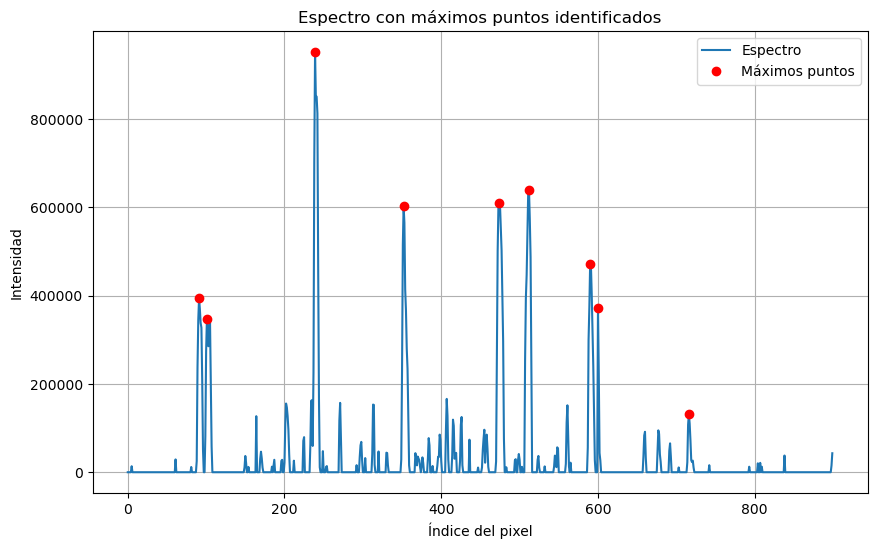

In [50]:
maximos=[91, 101,239, 352, 474, 512, 590, 600, 716 ]
# Visualización del espectro y los máximos puntos encontrados
plt.figure(figsize=(10, 6))
plt.plot(intensity_per_column_torio, label='Espectro')
plt.plot(maximos, intensity_per_column_torio[maximos], 'ro', label='Máximos puntos')
plt.xlabel('Índice del pixel')
plt.ylabel('Intensidad')
plt.title('Espectro con máximos puntos identificados')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
longitud_onda= [79.753, 83.555,  156.585, 168.222, 195.902, 206.670, 214.391, 214.618, 234.537]
# Crear una función de interpolación lineal
interpolacion = interp1d(maximos, longitud_onda, kind='linear', fill_value='extrapolate')

# Array de píxeles del espectro de la estrella
pixeles_estrella = np.arange(0, 1530)  # Ajusta el rango según la longitud de tu espectro

# Calibrar los píxeles a longitudes de onda utilizando la interpolación
longitudes_de_onda_estrella = interpolacion(pixeles_estrella)

# Verificación: Mostrar las primeras 10 longitudes de onda calibradas
print("Longitudes de onda calibradas para los primeros 10 píxeles:", longitudes_de_onda_estrella[:10])

Longitudes de onda calibradas para los primeros 10 píxeles: [45.1548 45.535  45.9152 46.2954 46.6756 47.0558 47.436  47.8162 48.1964
 48.5766]


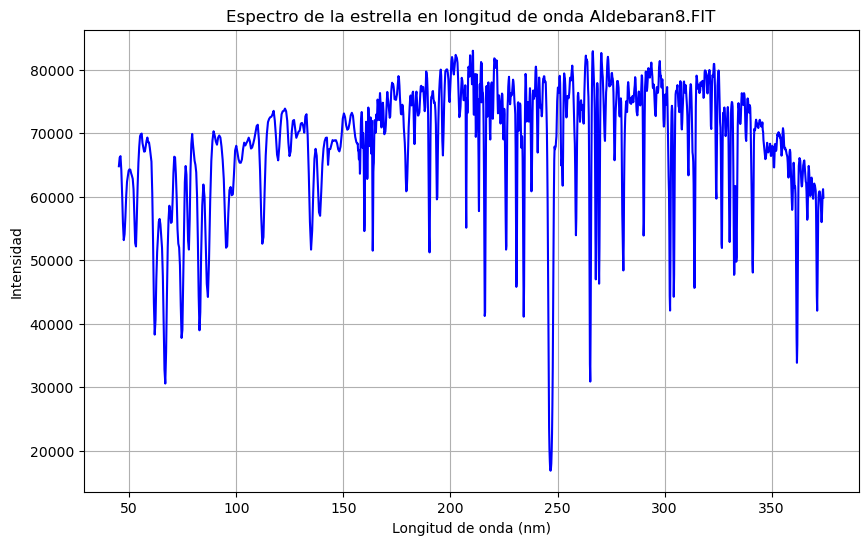

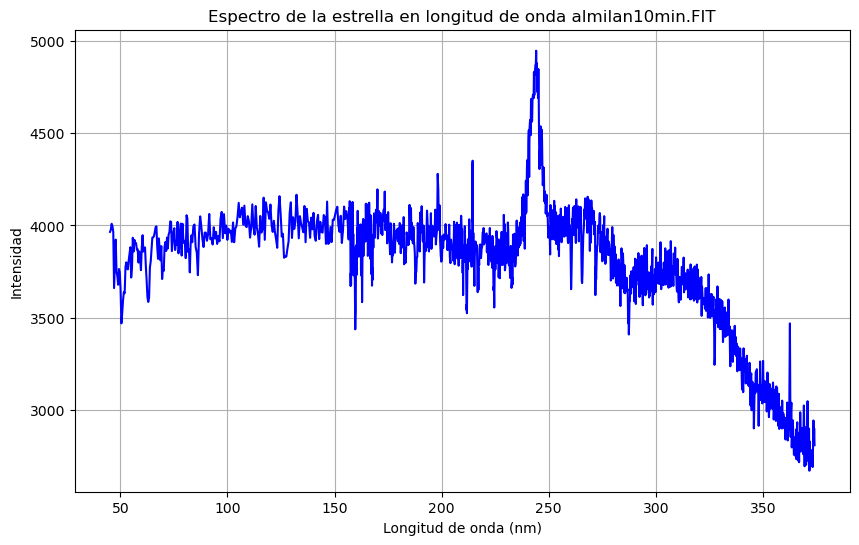

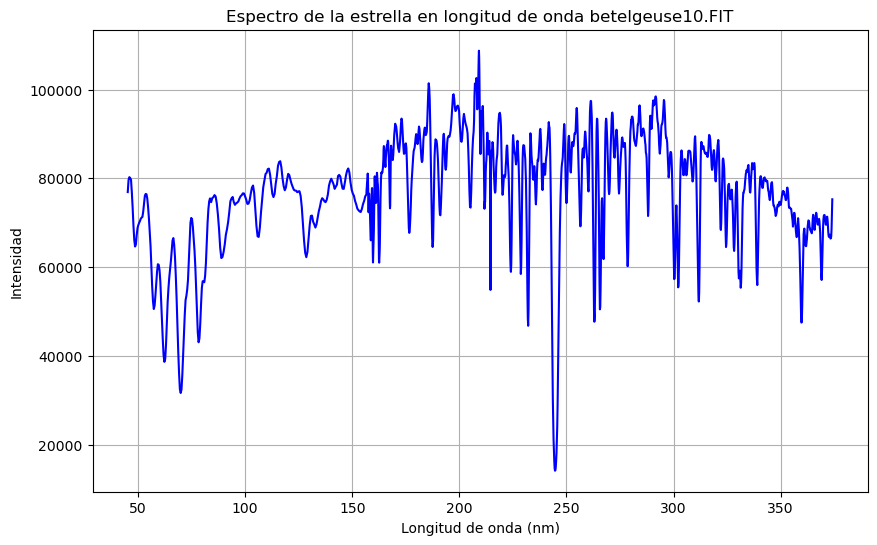

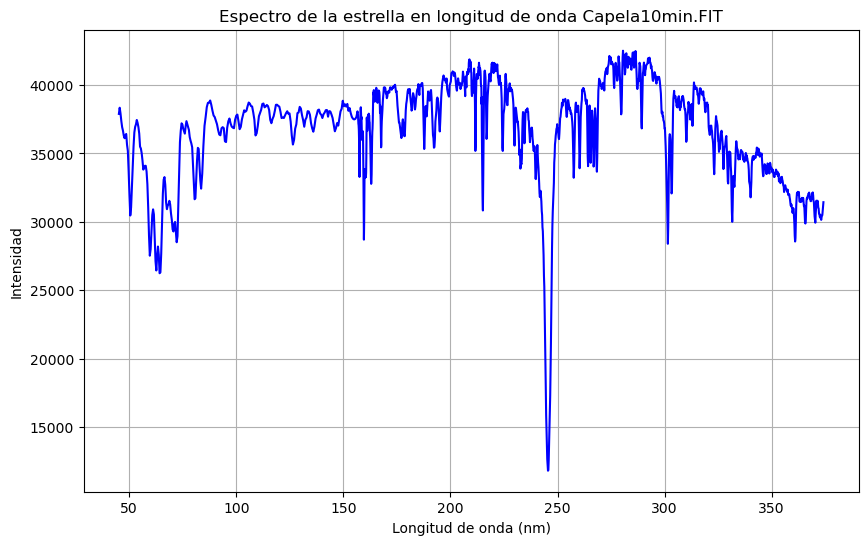

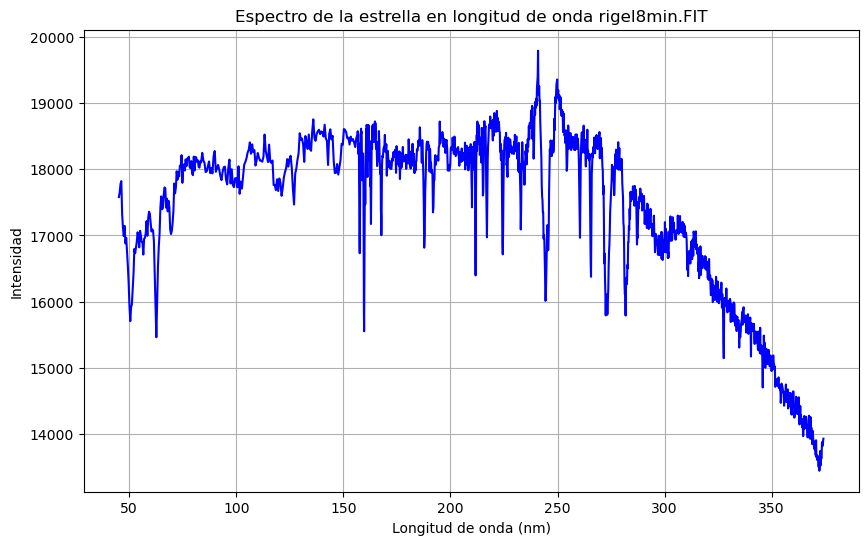

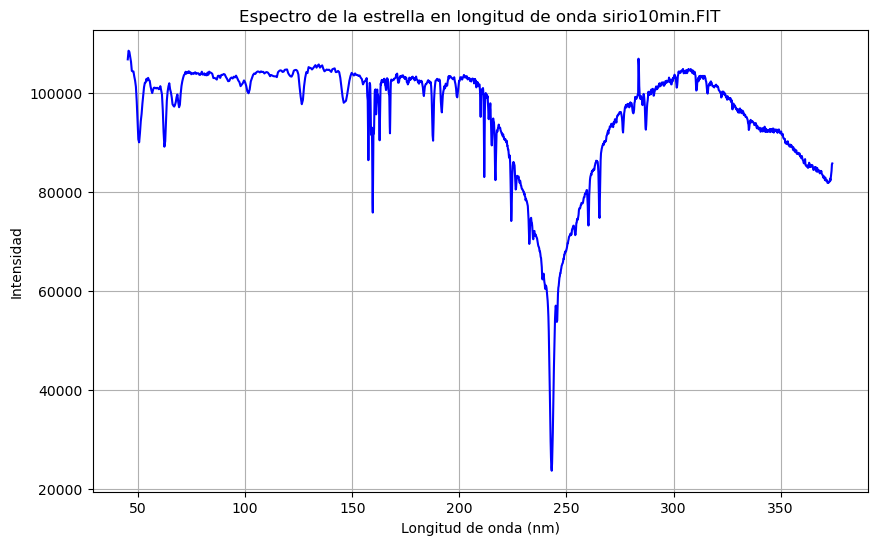

In [52]:
for clave, valor in spectra_clean.items():
    # Crear una función de interpolación lineal
    interpolacion = interp1d(maximos, longitud_onda, kind='linear', fill_value='extrapolate')

    # Array de píxeles del espectro de la estrella
    pixeles_estrella = np.arange(0, len(valor))  # Ajusta el rango según la longitud de tu espectro

    # Calibrar los píxeles a longitudes de onda utilizando la interpolación
    longitudes_de_onda_estrella = interpolacion(pixeles_estrella)
    espectro_estrella = valor
    # Visualización del espectro de la estrella en longitud de onda
    plt.figure(figsize=(10, 6))
    plt.plot(longitudes_de_onda_estrella, espectro_estrella, color='blue')
    plt.xlabel('Longitud de onda (nm)')
    plt.ylabel('Intensidad')
    plt.title('Espectro de la estrella en longitud de onda '+ str(clave))
    plt.grid(True)
    plt.show()